# Situação Problema: Previsão de Vendas de Sorvetes

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mapeamento do caminho e arquivo

path = 'C:\\Users\\Administrador\\Documents\\Modelos Personalizados do Office\\Rafael Nery - Fundamentos de Big Data e Data Analytics com Python\\Machine Learning\\'
file = 'IceCreamData.csv'

# Atribuir o arquivo a um Data Frame
ic = pd.read_csv(path + file)

### Verificar o cabeçalho e o Rodapé do Data Frame

In [51]:
ic.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [52]:
ic.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


### Descrever os dados númericos do Data Frame

In [53]:
ic.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


### Obter inforrmações do Data Frame

In [54]:
ic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


### Visualizar os dados no Dataset

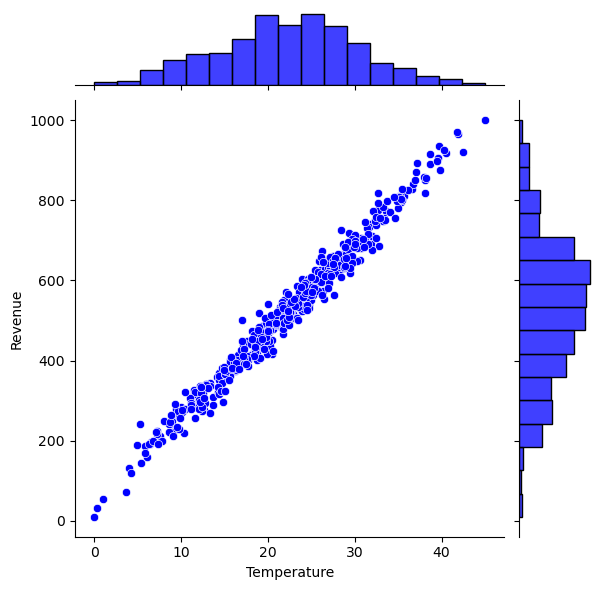

In [55]:
# Gráfico de dispersão e histograma

sns.jointplot(x = 'Temperature', y = 'Revenue', data = ic, color = 'blue')

### Pairplot

### Gráfico de Dispersão com Linha Média

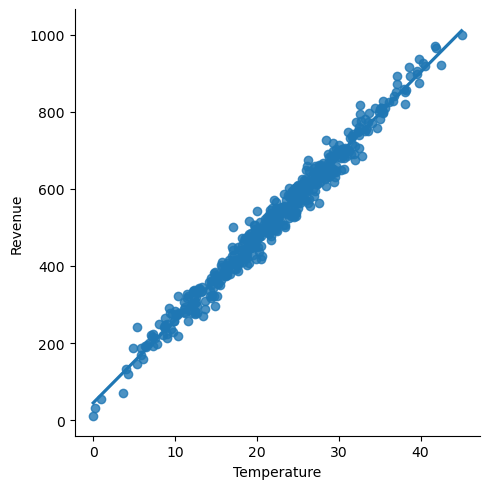

In [56]:
sns.lmplot(x = 'Temperature',
           y = 'Revenue',
           data = ic)

### Dividir o Dataset para criar as bases de treino

In [57]:
x = ic[['Temperature']]
y = ic[['Revenue']]

### Modelo de Treino

Importar a biblioteca Scikit Learn e dividir as bases em treino e teste, sendo que o tamanho do teste será 25%.

In [58]:
# Importar o comando train_test_split para dividir o Data Frame
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

In [60]:
X_train.shape

(375, 1)

In [61]:
X_test.shape

(125, 1)

In [62]:
y_train.shape

(375, 1)

In [63]:
y_test.shape

(125, 1)

### Importar o algoritmo LinearRegression da biblioteca ScikitLearn

In [64]:
from sklearn.linear_model import LinearRegression


In [67]:
# Este comando irá gerar a linha de tendência e calcular os coeficientes linear e angular
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression()

In [66]:
print('Coeficiente Angular (a): ', regressor.coef_)
print('Coeficiente Linear (b): ', regressor.intercept_)

Coeficiente Angular (a):  [[21.55361992]]
Coeficiente Linear (b):  [42.00150796]


### Executar o Teste

In [69]:
y_previsao = regressor.predict(X_test)
y_previsao

array([[576.06138209],
       [509.64571582],
       [561.47858155],
       [591.61199966],
       [351.93603127],
       [280.36507082],
       [310.18566573],
       [509.80025916],
       [682.29540841],
       [620.92576636],
       [198.50985143],
       [448.94152497],
       [409.48507219],
       [546.51262813],
       [433.17712869],
       [833.07479763],
       [349.94229901],
       [328.70337078],
       [467.78698213],
       [156.39750405],
       [230.72509088],
       [376.53873166],
       [524.75899729],
       [654.91245744],
       [605.02813444],
       [440.9236732 ],
       [713.61295611],
       [576.5868212 ],
       [395.04060407],
       [604.08553882],
       [518.73968359],
       [690.44625055],
       [474.15559444],
       [195.19366775],
       [381.55617406],
       [494.00576562],
       [622.30267001],
       [349.4324408 ],
       [769.31135688],
       [468.3185    ],
       [366.33872782],
       [439.4498634 ],
       [235.80648783],
       [305

### Plotando os resultados

Text(0.5, 1.0, 'Receita Gerada vs. Temperatura (Vendas de Sorvete)')

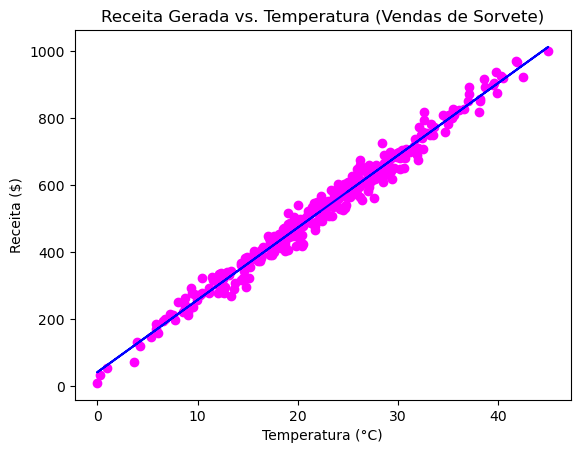

In [74]:
# Criar um gráfico d edispersão
plt.scatter(X_train, y_train, color = 'magenta')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.ylabel('Receita ($)')
plt.xlabel('Temperatura (°C)')
plt.title('Receita Gerada vs. Temperatura (Vendas de Sorvete)')